# How Pandas plays along with time series?

Generally speaking _very nicely_.

Let's see!

(Credits go to: [EarthPy](http://earthpy.org/pandas-basics.html))

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Ok, this is _really_ unhealthy practice, but honestly, do YOU want to do the demo for the C level 
# with big orangish blobs on the screen? 
# Exactly. Neither do I. :-P

# Don't tell me I didn't WARN you! :-P


In [2]:
# First things first...
import pandas as pd 

## Load troubles

In [3]:
print("Let's not forget, we are in Colab, so we are forced to use some bash magic to get the file for this VM also!")
!wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/AirPassangers.csv

Let's not forget, we are in Colab, so we are forced to use ssome bash magic to get the file for this VM also!


In [4]:
# Load
df = pd.read_csv("AirPassengers.csv",header=0)


In [5]:
# Let's just check the type and content of the columns for safety:

print(df.dtypes)
df.head()

Month          object
#Passengers     int64
dtype: object


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Oops! Do we see any suspicious with the `Month` column? 

In [6]:

print("Ok, what is dtypes returning?")
print(type(df.dtypes[0]))

print("Lemme guess! Numpy?")

import numpy as np

print("In numpy we have: ",np.dtype(object))

assert df.dtypes[0] == np.dtype(object)
print("Yeah, we're right. It's the same. :-)\n")

print("Takeaway: If Pandas does not recognize the data, it uses Numpy's 'WTF?' class.")

Ok, what is dtypes returning?
<class 'numpy.dtype'>
Lemme guess! Numpy?
In numpy we have:  object
Yeah, we're right. It's the same. :-)

Takeaway: If Pandas does not recognize the data, it uses Numpy's 'WTF?' class.


## Let us convert to proper dates!

In [7]:
print("Converting the easy way...\n")

reindexed_df = df.copy()
reindexed_df.Month = reindexed_df.Month.astype('datetime64[ns]')

print("By the way, can we write this more properly?")
print(pd.to_datetime(df['Month'], format='%Y-%m').head())
print("Looks good!\n")

print("And happily, this seems to be the same! :-)")
assert reindexed_df.Month.dtype==pd.to_datetime(df['Month'], format='%Y-%m')

reindexed_df = reindexed_df.set_index("Month")


Converting the easy way...

By the way, can we write this more properly?
0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Month, dtype: datetime64[ns]
Looks good!

And happily, this seems to be the same! :-)


More on datatime conversion and indexing can be found [here](https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea).

In [8]:
reindexed_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
reindexed_df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


If we would like to recreate an index like this in the future we should use the convenient Pandas functions!

Consult: [Pandas date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)


In [10]:
dates = pd.date_range('1949-01-01', periods=reindexed_df.shape[0], freq=pd.offsets.MonthBegin(1)) 

print(dates) 

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')


By default, using freq='M' would result in the last day of the month. 

Therefor we use the nice built-in function from `pd.offsets`.

In fact, great amount of convenience shortcuts are there:

<img src="http://drive.google.com/uc?export=view&id=1PBavHbwYB1DDIizt4NN8m-ymNhxw3Bpw" width=65%>


We don't believe how useful it is, except when we need it. :-P

## Plotting

Happily enough, Pandas default plotting (that is Matplotlib in the background) also plays nice with dates as indices.

In [11]:
df.plot()

...Well except that in default Jupyter, you only get back the "plot" object without either importing Matplotlib and manually calling `plt.show()`, or using `%pylab inline` magic. 

Populating the interactive namespace from numpy and matplotlib


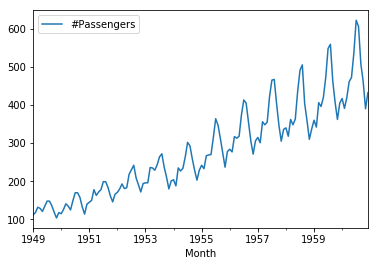

In [12]:
%pylab inline
reindexed_df.plot()

Yeah, much better, thanks! :-)

## Slice and dice

We can use nice indexing syntax to access ranges of time series.

We can use dates.



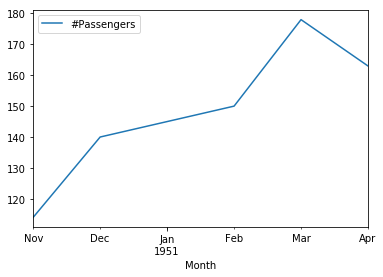

In [13]:
print("We can use dates.")
reindexed_df['1950-11':'1951-4'].plot()
print() # Just to get rid of the standard "return value" of the cell which would be an AxesSubplot object...

But we can stil use integer index.



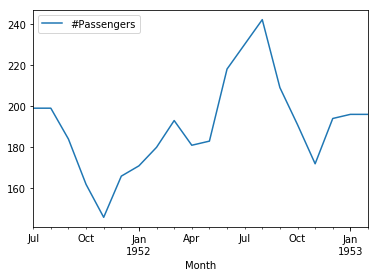

In [14]:
print("But we can stil use integer index.")
reindexed_df[30:50].plot()
print() #Damn annoying! - More on that in Matplotlib tutorial.

In [15]:
print("And it even handles dates in an intelligent manner, keeping the hierarchy.\n")
print(reindexed_df["1950"])

And it even handles dates in an intelligent manner, keeping the hierarchy.

            #Passengers
Month                  
1950-01-01          115
1950-02-01          126
1950-03-01          141
1950-04-01          135
1950-05-01          125
1950-06-01          149
1950-07-01          170
1950-08-01          170
1950-09-01          158
1950-10-01          133
1950-11-01          114
1950-12-01          140


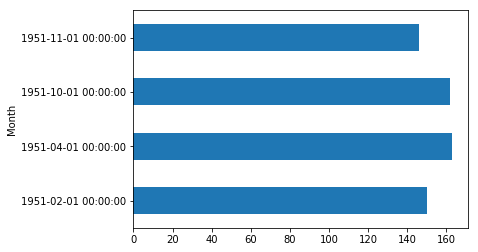

In [16]:
import datetime
reindexed_df.loc[(reindexed_df["#Passengers"] > 100) & (reindexed_df["#Passengers"] < 165) 
        & (reindexed_df.index > datetime.datetime(1951,1,1)) 
        & (reindexed_df.index < datetime.datetime(1952,1,1)),
        '#Passengers'].plot(kind='barh')

#Original even more fancy here: http://earthpy.org/pandas-basics.html

## Let's shift (gears)

It is one of the most important tasks in time series prediction is to get a time shifted value that we would use for prediction purposes.

Easy!

In [17]:
reindexed_df["shifted"]=reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1))

print("Looks awsome!\n")
print("Except....")

print(reindexed_df.dtypes,"\n\nWTF???\n")

print("Any non-numbers in there?",reindexed_df.shifted.isna().any())
print("Ah, ok, NaN-s are in there, and that's why it gcant get casted to Int.\n")

print("Lemme' fixit!")
reindexed_df["shifted"]=reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1), fill_value=0).astype(np.int64)
print(reindexed_df.dtypes)
print("WTF *2 ???")


Looks awsome!

Except....
#Passengers      int64
shifted        float64
dtype: object 

WTF???

Any non-numbers in there? True
Ah, ok, NaN-s are in there, and that's why it gcant get casted to Int.

Lemme' fixit!
#Passengers      int64
shifted        float64
dtype: object
WTF *2 ???


What happens here?

In [18]:

print(type(reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1)).astype(np.int64, copy=False)))
print("It's a series.")
print(reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1)).dtype)
print("It's dtype is right.")
print(reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1), fill_value=0).isna().any())
print("It has NO NaN-s!\n")
print("Wait, WHAT?\n")


print(reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1), fill_value=0).shape)
print(reindexed_df.shape)
print("Even shape looks good.\n")

print("Except:")
print(reindexed_df.shifted.isna().any(),"\n")

print("Lemme guess!")
print(reindexed_df.shifted[-1]==np.nan)
print("?????????\n")

print("Syrsly, Guys!!!!\n") 
#https://stackoverflow.com/questions/29528092/numpy-isnanvalue-not-the-same-as-value-numpy-nan

print(reindexed_df.shifted[-1])


<class 'pandas.core.series.Series'>
It's a series.
int64
It's dtype is right.
False
It has NO NaN-s!

Wait, WHAT?

(144,)
(144, 2)
Even shape looks good.

Except:
True 

Lemme guess!
False
?????????

Syrsly, Guys!!!!

nan


In [19]:
reindexed_df["shifted"]=reindexed_df.shifted.replace(nan,0).astype(np.int64)

#Observe, if we don't put fancy characters into a column name, we can use a dotted accessor.
#Except for value assignment :-(

print(reindexed_df.dtypes)

#Passengers    int64
shifted        int64
dtype: object


In [20]:
reindexed_df.head()

,#Passengers,shifted
Month,,
1949-01-01,112,118
1949-02-01,118,132
1949-03-01,132,129
1949-04-01,129,121
1949-05-01,121,135


**Takeaways:**

- NaN-s get introduced by mapping based on a datetime index
- nan != nan (by convention??? :-((

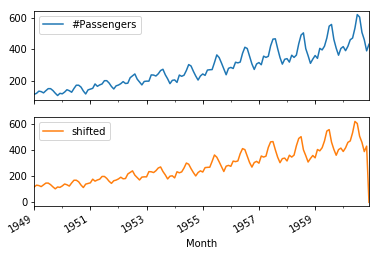

In [21]:
reindexed_df.plot(subplots=True) #Observe, we can get this in one nice plot!
None #Hah! What a trick! :-P

## What a difference?

Whilst we are here, we can try to produce a difference vector from our time series.

In [22]:
diff = reindexed_df["#Passengers"].diff(-1) == reindexed_df["#Passengers"]-reindexed_df.shifted
diff[-5:]

Month
1960-08-01     True
1960-09-01     True
1960-10-01     True
1960-11-01     True
1960-12-01    False
dtype: bool

**Takeaway:**

DataFrame.diff() "Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).

periods : int, default 1
Periods to shift for calculating difference, accepts negative values."

## Resampling

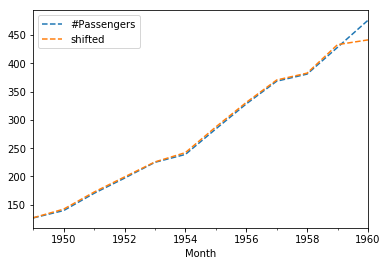

In [23]:
reindexed_df.resample("AS").mean().plot(style='--') #"A" meaning Annual, "S" meaning start, "year begin"...
None

We were so adept to introduce a bias there with our 0 value.

This can hurt big time, so bear in mind...

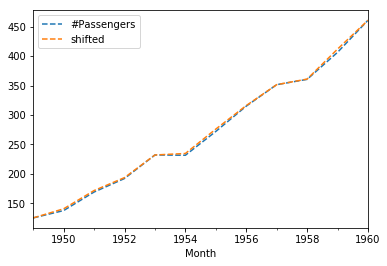

In [24]:
reindexed_df.resample("A").median().plot(style='--') #"A" meaning Annual...
None

Median helps...

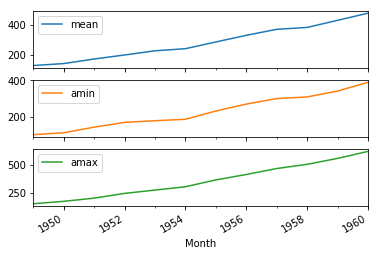

In [25]:
reindexed_df["#Passengers"].resample("A").apply(['mean', np.min, np.max]).plot(subplots=True)
None

## Rolling window functions

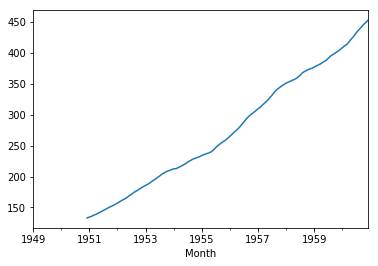

In [26]:
reindexed_df["#Passengers"].rolling(window=24, center=False).mean().plot()
None

Can come in super handy for financial time series - think "moving average"!!!

## Correlations

In [27]:
reindexed_df.corr()

,#Passengers,shifted
#Passengers,1.000000,0.916288
shifted,0.916288,1.000000


# Other useful tools 

For a wider range of time series tools in Python see [here](https://github.com/MaxBenChrist/awesome_time_series_in_python).

